# Pycaretドキュメントを見て、top3のブレンドしたモデルを作る

SIGNATE投稿結果 3221.2358740  
train_all_column_additionを使用  
- [中級者用ドキュメント](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)
- [初級者用ドキュメント](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)

## インポート

In [12]:
from pycaret.regression import *

## データの読み込み

In [13]:
train = pd.read_csv("data/create/train_all_column_addition.csv")

In [14]:
train.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa', 'tv_num', 'home_lat',
       'home_long', 'away_lat', 'away_long', 'distance_km', 'mobilization',
       'stage_stadium', 'stadium_mobilization', 'MONTH', 'WEEK', 'timezone',
       'WEEK_timezone_num', 'nhk', 'WEATHER', 'temp_condition', 'hours'],
      dtype='object')

In [15]:
# 必要なものを抜き出す
select_cols = ['y', 'year', 'stage', 'home', 'away',
       'stadium', 'temperature', 'referee', 'capa', 'tv_num',  'distance_km', 
       'stadium_mobilization', 'MONTH', 'WEEK', 'timezone', 'nhk', 'WEATHER']
train_select = train[select_cols]

In [16]:
train_select.head()

,y,year,stage,home,away,stadium,temperature,referee,capa,tv_num,distance_km,stadium_mobilization,MONTH,WEEK,timezone,nhk,WEATHER
0,18250,2012,Ｊ１,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,3.8,木村 博之,19694,4,259.062331,0.766782,3,土,1,1,雨
1,24316,2012,Ｊ１,名古屋グランパス,清水エスパルス,豊田スタジアム,12.4,西村 雄一,40000,4,120.059935,0.512800,3,土,1,0,屋
2,17066,2012,Ｊ１,ガンバ大阪,ヴィッセル神戸,万博記念競技場,11.3,高山 啓義,21000,4,38.255309,0.712667,3,土,1,0,晴
3,29603,2012,Ｊ１,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,11.4,松尾 一,50000,4,685.986038,0.306080,3,土,1,0,曇
4,25353,2012,Ｊ１,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,22.5,廣瀬 格,39232,4,966.885906,0.330954,3,土,1,0,屋


In [17]:
# データをセット
dataset=train_select

In [18]:
dataset.shape

(1952, 17)

## 訓練データとテストデータを9：1の割合で分割

In [19]:
data = dataset.sample(frac =0.9, random_state = 0).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
print("All Data: " + str(dataset.shape))
print("Data for Modeling: " + str(data.shape))
print("Unseen Data For Predictions: " + str(data_unseen.shape))

All Data: (1952, 17)
Data for Modeling: (1757, 17)
Unseen Data For Predictions: (195, 17)


## 環境を作る、前処理をする
すべてのデータ型が正しく認識された場合、Enter キーを押して処理を続行するか、quit キーを押して処理を終了する  
データの型がちがう時は、`numeric_features = ["tv_num"]`みたいに設定してあげる

In [20]:
# 　target：目標値
exp = setup(data=data, target='y',numeric_features = ["tv_num"])
# それぞれのデータはどういうものか表示 確認

,Description,Value
0,session_id,241
1,Target,y
2,Original Data,"(1757, 17)"
3,Missing Values,0
4,Numeric Features,5
5,Categorical Features,11
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(1229, 209)"


## 全てのモデルを比較する
`n_select`パラメータを使用すると、上位N個のモデルを返す
- 不要だったもの
  - `exclude = ['ransac']`は使わないよって意味らしい。省略して良さそう
  - `sort = "R2"`, `fold = 10` これもデフォルト

In [25]:
top3 = compare_models(exclude = ['ransac'], n_select = 3, sort = "R2", fold = 10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2199.6870,10938830.1623,3246.9890,0.8352,0.3849,0.2526,0.0100
lasso,Lasso Regression,2206.3104,11061463.0372,3264.9517,0.8332,0.3924,0.2517,0.0260
gbr,Gradient Boosting Regressor,2191.8123,11320561.3550,3310.4267,0.8284,0.2918,0.2428,0.1180
omp,Orthogonal Matching Pursuit,2246.1008,11570047.6759,3344.1200,0.8240,0.3811,0.2620,0.0110
lightgbm,Light Gradient Boosting Machine,2208.8709,11823434.6327,3375.1731,0.8219,0.2964,0.2374,0.5860
lr,Linear Regression,2361.1755,12080619.7513,3406.7781,0.8174,0.4169,0.2820,0.0320
xgboost,Extreme Gradient Boosting,2206.4816,12615645.7558,3497.9452,0.8070,0.2831,0.2284,0.6640
rf,Random Forest Regressor,2240.5497,12833977.8339,3523.1643,0.8052,0.2891,0.2378,0.2920
et,Extra Trees Regressor,2378.3427,14580734.5687,3789.3947,0.7721,0.2901,0.2376,0.3890
ada,AdaBoost Regressor,3362.0935,18374204.1669,4268.9979,0.7114,0.4979,0.5416,0.1020


In [26]:
type(top3)

list

- top3の中身の確認  
  Ridge, Lasso, GradientBoostingRegressorの3つが入っている

In [27]:
print(top3)

[Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=241, solver='auto', tol=0.001), Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=241,
      selection='cyclic', tol=0.0001, warm_start=False), GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=241, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)]


## モデルの作成
- 複数のモデルを作成し、個々の予測を平均して最終的な予測を作成
- (ほかにもシングルモデル、スタッキングなどある)


### ①任意の3つをブレンドモデルを作成

In [34]:
# それぞれモデルを作成
lightgbm = create_model('lightgbm', verbose = False)
gbr = create_model('gbr', verbose = False)
xgboost = create_model('xgboost', verbose = False)

/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/niko/Desktop/MyApp/st

In [35]:
# 個々のモデルをブレンドする
blender = blend_models(estimator_list = [lightgbm, gbr, xgboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2037.2249,9617519.5640,3101.2126,0.8181,0.2536,0.2162
1,1912.9139,7533509.4119,2744.7239,0.8601,0.2742,0.2266
2,2207.7674,10086966.0899,3175.9984,0.8928,0.2528,0.2065
3,1818.1854,10348282.4290,3216.8746,0.7904,0.2623,0.2120
4,2490.4531,22938021.1031,4789.3654,0.7859,0.3144,0.2522
5,1741.3224,7379017.3688,2716.4347,0.8712,0.2967,0.2309
6,2078.9778,9878440.9313,3142.9987,0.8461,0.2515,0.2049
7,2104.7060,9839992.5658,3136.8762,0.8361,0.2790,0.2295
8,2658.5400,15838136.2047,3979.7156,0.7752,0.2960,0.2309
9,1910.3448,7054012.0826,2655.9390,0.8562,0.2557,0.2147


任意のブレンドモデルの結果 blender : r2 = 0.8332

### ②モデル比較時のtop3でモデルを作成(アンサンブル)

In [33]:
# compare_modelsのtop3モデルをブレンドする
blender_top3 = blend_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2099.1476,9292447.6368,3048.3516,0.8243,0.2703,0.2251
1,1808.8412,6548414.8773,2558.9871,0.8784,0.2799,0.2217
2,2116.7773,9179062.8996,3029.6968,0.9025,0.2914,0.2120
3,1767.2590,8602663.7979,2933.0298,0.8257,0.3299,0.2298
4,2485.1489,21513707.2130,4638.2871,0.7992,0.3272,0.2657
5,1946.4213,7072660.5053,2659.4474,0.8766,0.3203,0.2635
6,2119.0171,10172876.7974,3189.4948,0.8415,0.2487,0.1987
7,2184.8959,10092585.3513,3176.8830,0.8319,0.2825,0.2464
8,2682.0859,15517583.4883,3939.2364,0.7797,0.3105,0.2374
9,1837.8818,6007871.8437,2451.0960,0.8775,0.2769,0.2316


top3ブレンドの結果 blender_top3 : r2 = 0.8437  
ここからはblender_top3モデルで続けていく

In [36]:
print(blender_top3.estimators_)

[Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=241, solver='auto', tol=0.001), Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=241,
      selection='cyclic', tol=0.0001, warm_start=False), GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=241, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)]


## モデルを調整する
- tune_model関数の第一引数にモデル（作成したランダムフォレストモデル）を指定します。
- optimize引数には対象となる指標を指定します。今回はR2を設定

In [37]:
# ハイパーパラメータチューニング
tuned_blender_top3 = tune_model(blender_top3, optimize = "r2", fold = 10, n_iter = 50)
tuned_blender_top3

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2090.3887,9311284.2668,3051.4397,0.8239,0.2640,0.2222
1,1816.5284,6555668.2762,2560.4039,0.8783,0.2764,0.2240
2,2125.8284,9388850.1100,3064.1231,0.9003,0.2745,0.2112
3,1780.3130,8772124.0931,2961.7772,0.8223,0.3120,0.2303
4,2450.7672,21350739.3201,4620.6860,0.8007,0.3228,0.2614
5,1912.4104,6924183.9875,2631.3844,0.8792,0.3076,0.2575
6,2088.6070,9877017.7585,3142.7723,0.8461,0.2427,0.1975
7,2208.2984,10185976.1303,3191.5476,0.8303,0.2857,0.2473
8,2681.7566,15410755.2883,3925.6535,0.7812,0.3042,0.2343
9,1821.4649,5838798.1943,2416.3605,0.8810,0.2736,0.2289


VotingRegressor(estimators=[('ridge',
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=241, solver='auto',
                                   tol=0.001)),
                            ('lasso',
                             Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=241, selection='cyclic',
                                   tol=0.0001, warm_start=False)),
                            ('gbr',
                             Gr...
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
    

## モデルをプロットする

In [38]:
# モデルの評価指標を確認
evaluate_model(tuned_blender_top3)
# 特定のモデルで使用可能なすべてのプロットのユーザーインターフェイスを表示します。 内部的にはplot_model（）関数を使用します。

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

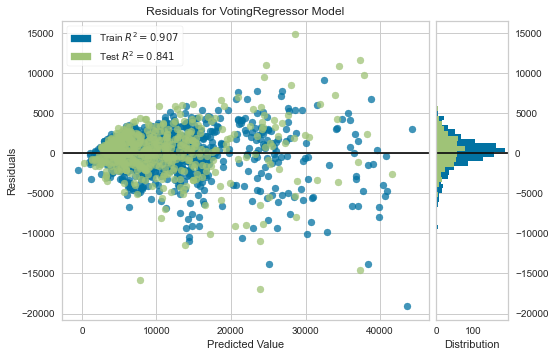

In [39]:
# Residuals Plot 残差プロットを表示
plot_model(tuned_blender_top3, "residuals")

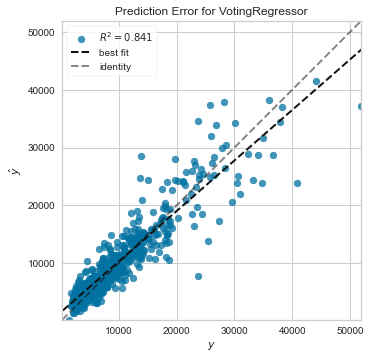

In [40]:
# Prediction Error Plotでは、予測精度
plot_model(tuned_blender_top3, "error")

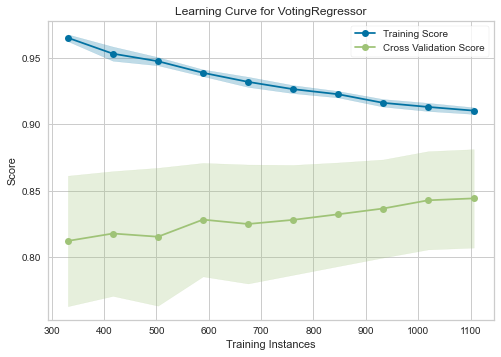

In [41]:
# Learing Curveでは、学習曲線
plot_model(tuned_blender_top3, "learning")

## テスト/ホールドアウトサンプルの予測
モデルを完成させる前に、  
テスト/ホールドアウトセットを予測し、評価メトリックを確認することにより、1つの最終チェックを実行することをお勧めします。  
上記のセクション6の情報グリッドを見ると、データの30％がテスト/ホールドアウトサンプルとして分離されていることがわかります。  
上記で確認したすべての評価指標は、トレーニングセット（70％）のみに基づく相互検証された結果です。  
ここで、tuned_blender_top3変数に格納されている最終的なトレーニング済みモデルを使用して、ホールドアウトサンプルを予測し、  
メトリックを評価して、CVの結果と実質的に異なるかどうかを確認します。

In [44]:
# 確定したモデルで推論
predict_model(tuned_blender_top3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2038.4627,9224587.8577,3037.2007,0.8406,0.3049,0.2524


,temperature,capa,tv_num,distance_km,stadium_mobilization,year_2012,year_2013,year_2014,stage_Ｊ１,home_アビスパ福岡,...,WEEK_金,timezone_1,nhk_1,WEATHER_屋,WEATHER_晴,WEATHER_曇,WEATHER_雨,WEATHER_雪,y,Label
0,20.799999,15135.0,3.0,448.563660,0.193525,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1894,3464.054448
1,26.400000,20000.0,2.0,107.623924,0.241250,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6060,7188.752870
2,24.299999,30132.0,3.0,500.268616,0.465817,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16727,15020.137066
3,21.400000,19694.0,4.0,874.109558,0.766782,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,18863,16602.188361
4,16.600000,20246.0,2.0,482.632385,0.212338,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2467,5485.557857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,5.600000,12000.0,4.0,873.520996,0.351458,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4280,4937.248976
524,27.000000,22563.0,2.0,340.979553,0.227142,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5482,5621.993460
525,25.000000,19694.0,2.0,1008.332947,0.766782,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13411,13997.651713
526,9.300000,40728.0,3.0,84.249176,0.369672,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,23507,19805.639378


r2= 0.8406  
モデルを調整した時の r2= 0.8443 より下がっているが、  
モデルを完成させ、見えないデータ（最初に分離し、PyCaretにさらされたことのない10％）を予測することで前進します。

## モデルの完成
`finalize_model()`関数は、モデルをテスト/ホールドアウトサンプル（この場合は30％）を含む完全なデータセットに適合させます

In [45]:
final_blender_top3 = finalize_model(tuned_blender_top3)
final_blender_top3

Duplicate key in file PosixPath('/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  IPAexGothic')
Duplicate key in file PosixPath('/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  IPAexGothic')
Duplicate key in file PosixPath('/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  IPAexGothic')
Duplicate key in file PosixPath('/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  IPAexGothic')
Duplicate key in file PosixPath('/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  IPAexGothic')
Duplicate key in file PosixPath('/U

VotingRegressor(estimators=[('ridge',
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=241, solver='auto',
                                   tol=0.001)),
                            ('lasso',
                             Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=241, selection='cyclic',
                                   tol=0.0001, warm_start=False)),
                            ('gbr',
                             Gr...
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
    

In [47]:
predict_model(final_blender_top3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,1714.8372,6190202.2261,2488.0117,0.8931,0.2608,0.2155


,temperature,capa,tv_num,distance_km,stadium_mobilization,year_2012,year_2013,year_2014,stage_Ｊ１,home_アビスパ福岡,...,WEEK_金,timezone_1,nhk_1,WEATHER_屋,WEATHER_晴,WEATHER_曇,WEATHER_雨,WEATHER_雪,y,Label
0,20.799999,15135.0,3.0,448.563660,0.193525,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1894,3293.844436
1,26.400000,20000.0,2.0,107.623924,0.241250,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6060,6659.843536
2,24.299999,30132.0,3.0,500.268616,0.465817,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16727,14934.481366
3,21.400000,19694.0,4.0,874.109558,0.766782,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,18863,16495.308989
4,16.600000,20246.0,2.0,482.632385,0.212338,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2467,5170.900117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,5.600000,12000.0,4.0,873.520996,0.351458,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4280,4459.990887
524,27.000000,22563.0,2.0,340.979553,0.227142,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5482,5686.352905
525,25.000000,19694.0,2.0,1008.332947,0.766782,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13411,13751.460979
526,9.300000,40728.0,3.0,84.249176,0.369672,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,23507,20523.302098


70％のデータでモデルを調整して、さらに残り30％分を読み込んだので最終的にfinalize_modelで合わせたので  
r2= 0.8406 から r2=0.8931まで上がった

 ## 見えないデータを予測する
見えないデータセットを予測するために`predict_model（）`を使用されます。  
*データdata_unseen*は、最初に作成された変数であり、PyCaretに公開されたことのない元のデータセットの10％が含まれている  
final_lightgbmモデルを使用した予測値が、データdata_unseenセットに`Label列`が追加される

In [48]:
unseen_predictions = predict_model(final_blender_top3, data=data_unseen)
unseen_predictions.head()

,y,year,stage,home,away,stadium,temperature,referee,capa,tv_num,distance_km,stadium_mobilization,MONTH,WEEK,timezone,nhk,WEATHER,Label
0,5658,2014,Ｊ２,横浜ＦＣ,ＦＣ岐阜,ニッパツ三ツ沢球技場,17.8,扇谷 健司,15454,2,257.763469,0.362398,4,日,1,0,曇,5174.849280
1,6565,2014,Ｊ２,京都サンガF.C.,モンテディオ山形,京都市西京極総合運動公園陸上競技場兼球技場,15.9,松尾 一,20588,3,557.682459,0.355377,4,日,1,0,曇,6198.407622
2,2272,2014,Ｊ２,愛媛ＦＣ,カターレ富山,ニンジニアスタジアム,11.5,河合 英治,15576,3,510.864549,0.226759,4,日,1,0,雨,1558.239429
3,4833,2014,Ｊ２,アビスパ福岡,Ｖ・ファーレン長崎,レベルファイブスタジアム,13.4,前田 拓哉,22563,3,91.917593,0.227142,4,日,1,0,雨,4620.347497
4,3970,2014,Ｊ２,ギラヴァンツ北九州,ジュビロ磐田,北九州市立本城陸上競技場,13.0,山本 雄大,10202,2,664.230610,0.306558,4,日,1,0,雨,2682.755336


In [49]:
# 測定基準
from pycaret.utils import check_metric
check_metric(unseen_predictions.y, unseen_predictions.Label, 'R2')

0.6838

## モデルの保存
予測したい新しいデータが出てきた時に使う  
（コンペではしなくていいかも。コメントアウトしよ）  
（保存したモデルの呼び出しは省略）

In [50]:
# # save_model関数を使うと、モデルの保存をする
# save_model(final_blender_top3, model_name="0317_blender_top3_model")
# %ls
# # 0314_rf_model.pklのファイル名で保存された

Transformation Pipeline and Model Successfully Saved
0101_EDA.ipynb                 0314_rf_model.pkl
0102_EDA_Autoviz.ipynb         0315_Modeling_pycarent.ipynb
0201_Preprocessing.ipynb       0315_gbr_model.pkl
0202_Preprocessing_niko.ipynb  0316_Modeling_pycarent.ipynb
0203_Preprocessing_niko.ipynb  0316_lightgbm_model.pkl
0301_Modeling_Sample.ipynb     0317_Modeling_pycarent.ipynb
0302_Modeling_niko.ipynb       0317_blender_top3_model.pkl
0303_Modeling_pycarent.ipynb   04_Modeling.ipynb
0304_Modeling_pycarent.ipynb   2014_add.csv
0305_Modeling_pycarent.ipynb   DT_pred1.csv
0306_Modeling_pycarent.ipynb   LR_pred1.csv
0307_Modeling_pycarent.ipynb   RF_pred1.csv
0308_Modeling_pycarent.ipynb   Ranking.ipynb
0309_Modeling_sample.ipynb     data/
0310_Modeling_lightgbm.ipynb   lat_lng.ipynb
0311_Modeling_lightgbm.ipynb   logs.log
0312_Modeling_pycarent.ipynb   sample2.csv
0313_Modeling_pycarent.ipynb   team_home_stadium.ipynb
0314_Modeling_pycarent.ipynb   予測履歴.md
0314_lightgbm_model.pkl


## 予測データを作る（コンペ提出用）

### データの読み込み

In [51]:
test = pd.read_csv("data/create/test_all_column_addition.csv")

In [52]:
# 必要なものを抜き出す trainとのちがいは、yがない
select_cols = ['year', 'stage', 'home', 'away',
       'stadium', 'temperature', 'referee', 'capa', 'tv_num',  'distance_km', 
       'stadium_mobilization', 'MONTH', 'WEEK', 'timezone', 'nhk', 'WEATHER']
testX = test[select_cols]
testX.insert(0, 'y', None)

In [53]:
testX.head()

,y,year,stage,home,away,stadium,temperature,referee,capa,tv_num,distance_km,stadium_mobilization,MONTH,WEEK,timezone,nhk,WEATHER
0,None,2014,Ｊ１,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,27.4,中村 太,19694,2,288.608038,0.766782,8,土,0,0,晴
1,None,2014,Ｊ１,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,30.8,扇谷 健司,40728,2,770.014476,0.369672,8,土,0,0,晴
2,None,2014,Ｊ１,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,31.7,松尾 一,63700,4,436.036443,0.584160,8,土,0,0,晴
3,None,2014,Ｊ１,柏レイソル,川崎フロンターレ,日立柏サッカー場,29.3,高山 啓義,15349,2,41.309766,0.771255,8,土,0,0,晴
4,None,2014,Ｊ１,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,30.4,今村 義朗,42300,2,481.886533,0.576560,8,土,0,0,晴


### `predict_model`で予測

In [54]:
testX.drop('y', axis = 1, inplace = True)
test_data_predictions_blender_top3=predict_model(final_blender_top3, data = testX)
test_data_predictions_blender_top3

,year,stage,home,away,stadium,temperature,referee,capa,tv_num,distance_km,stadium_mobilization,MONTH,WEEK,timezone,nhk,WEATHER,Label
0,2014,Ｊ１,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,27.4,中村 太,19694,2,288.608038,0.766782,8,土,0,0,晴,14342.532047
1,2014,Ｊ１,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,30.8,扇谷 健司,40728,2,770.014476,0.369672,8,土,0,0,晴,17501.700430
2,2014,Ｊ１,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,31.7,松尾 一,63700,4,436.036443,0.584160,8,土,0,0,晴,36509.586409
3,2014,Ｊ１,柏レイソル,川崎フロンターレ,日立柏サッカー場,29.3,高山 啓義,15349,2,41.309766,0.771255,8,土,0,0,晴,12635.680574
4,2014,Ｊ１,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,30.4,今村 義朗,42300,2,481.886533,0.576560,8,土,0,0,晴,30636.404556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2014,Ｊ２,カターレ富山,ファジアーノ岡山,富山県総合運動公園陸上競技場,13.3,長谷 拓,25250,2,367.228214,0.143683,11,日,1,0,曇,6095.849968
309,2014,Ｊ２,京都サンガF.C.,ＦＣ岐阜,京都市西京極総合運動公園陸上競技場兼球技場,17.4,松尾 一,20588,5,107.623923,0.355377,11,日,1,0,晴,11604.570037
310,2014,Ｊ２,カマタマーレ讃岐,ジェフユナイテッド千葉,香川県立丸亀競技場,23.0,高山 啓義,22338,2,597.233124,0.124093,11,日,1,0,晴,6657.025588
311,2014,Ｊ２,アビスパ福岡,ロアッソ熊本,レベルファイブスタジアム,19.5,三上 正一郎,22563,2,88.865814,0.227142,11,日,1,0,晴,8638.128218


### 提出データの作成

In [55]:
sample = pd.read_csv("data/received/sample_submit.csv",header=None)
sample[1] = test_data_predictions_blender_top3['Label']
sample.to_csv("data/predict/0317_Modeling_pycarent_blender_top3.csv",index=None,header=None)

SIGNATE投稿結果 3221.2358740

### 最小値補正

In [56]:
# pred = model3.predict(trainX)
print("MIN", sample[1].min(), train[train["y"]>0]["y"].min())
# 予測値が学習データの最小値を下回るケースは7ケース
print(sample[1][sample[1]<train[train["y"]>0]["y"].min()])

MIN 3355.4676750001013 1104
Series([], Name: 1, dtype: float64)


最小値が、学習データより小さいのはなかったので補正なし

### 残差分析をして、更に精度を上げるか検討

In [ ]:
# # trainの全部のデータに予測する
# train_data_predictions_lightgbm=predict_model(final_lightgbm, data = testX)
# train_data_predictions_lightgbm

In [ ]:
# tmp = train[train["y"]>0]
# tmp = tmp.drop(columns="pred")

# tmp["pred"] = model3.predict(trainX)
# tmp["res"] = tmp["y"] - tmp["pred"]
# tmp.sort_values(by="res")[["res","y","capa","pred","year","stage","match","gameday","time","home","away","tv"]].head(10)